## Name: Metwally Mohamed

# Neural Models Analysis Project

==============================

This project explores different neural models and their dynamics through simulation and analysis.
The project is structured in independent sections that can be run separately:

1. Single Neuron Models
   - Fitzhugh-Nagumo model implementation and phase plane analysiside
   
   - Izhikevich neuron model with different parameter sets
   - Comparison of model behaviors

2. Network Dynamics
   - Small network of coupled neurons with excitatory/inhibitory connections
   - Population dynamics with directed connectivity
   - Analysis of synchronization and emergent behaviors

3. Advanced Analysis
   - Spike train analysis (ISI, CV, firing rates)
   - Phase plane and bifurcation analysis
   - Network topology influence on dynamics

Parameters Exploration:
- Neuron model parameters (a, b, c, d for Izhikevich; time constants for FN)
- Network connectivity patterns (random, small-world, scale-free)
- Input current variations (constant, periodic, noisy)
- Coupling strengths between neurons

Use Cases:
1. Study of different firing patterns (tonic, bursting, chattering)
2. Analysis of network synchronization
3. Investigation of parameter-dependent bifurcations
4. Comparison of model computational efficiency
## Contents:
1. Single Neuron Models
   - FitzHugh-Nagumo Model
   - Izhikevich Neuron Model
2. Network Implementation
3. Analysis and Visualization

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import networkx as nx
from scipy import stats
import pandas as pd
import os

## 1. Single Neuron Models
### 1.1 FitzHugh-Nagumo Model

In [4]:
class FitzhughNagumo:
    def __init__(self, a=0.7, b=0.8, c=12.5, I_ext=0.5):
        self.a = a
        self.b = b
        self.c = c
        self.I_ext = I_ext
    
    def dynamics(self, state, t):
        """
        Compute the dynamics of the FitzHugh-Nagumo model.
        
        Parameters:
        -----------
        state : list
            Current state [v, w]
        t : float
            Current time point
            
        Returns:
        --------
        list
            Rate of change [dv/dt, dw/dt]
        """
        v, w = state
        dv = v - v**3/3 - w + self.I_ext
        dw = (v + self.a - self.b*w)/self.c
        return [dv, dw]

    def simulate(self, T=100, dt=0.01, initial_state=None):
        """Simulate the FitzHugh-Nagumo model."""
        t = np.arange(0, T, dt)
        if initial_state is None:
            initial_state = [-0.5, 0.0]
        solution = odeint(self.dynamics, initial_state, t)
        return t, solution

    def phase_plane_analysis(self, v_range=(-2, 2), w_range=(-2, 2), grid_size=20):
        """Compute phase plane data including nullclines and vector field."""
        v = np.linspace(v_range[0], v_range[1], grid_size)
        w = np.linspace(w_range[0], w_range[1], grid_size)
        V, W = np.meshgrid(v, w)
        
        # Compute vector field
        dV = V - V**3/3 - W + self.I_ext
        dW = (V + self.a - self.b*W)/self.c
        
        # Compute nullclines
        # V-nullcline: v - v^3/3 - w + I = 0
        v_null = np.linspace(v_range[0], v_range[1], 100)
        w_null_v = v_null - v_null**3/3 + self.I_ext
        
        # W-nullcline: w = (v + a)/b
        w_null_w = (v_null + self.a)/self.b
        
        return {
            'V': V, 'W': W, 'dV': dV, 'dW': dW,
            'nullcline_v': (v_null, w_null_v),
            'nullcline_w': (v_null, w_null_w)
        }

    def explain_results(self, t, solution):
        """Analyze and explain the simulation results with enhanced metrics."""
        v = solution[:, 0]  # membrane potential
        w = solution[:, 1]  # recovery variable
        
        # Calculate key metrics
        analysis = {
            'mean_potential': np.mean(v),
            'max_potential': np.max(v),
            'min_potential': np.min(v),
            'oscillation_frequency': len(np.where(np.diff(np.signbit(v)))[0]) / (2 * t[-1]),
            'recovery_mean': np.mean(w),
            'phase_space_area': np.abs(np.trapz(w, v)),
            'stability_metric': np.std(v) / np.mean(np.abs(v))
        }
        
        # Print formatted analysis results
        print("\nFitzHugh-Nagumo Model Analysis:")
        print("================================")
        print(f"Mean Membrane Potential: {analysis['mean_potential']:.3f}")
        print(f"Potential Range: [{analysis['min_potential']:.3f}, {analysis['max_potential']:.3f}]")
        print(f"Oscillation Frequency: {analysis['oscillation_frequency']:.2f} Hz")
        print(f"Mean Recovery Variable: {analysis['recovery_mean']:.3f}")
        print(f"Phase Space Area: {analysis['phase_space_area']:.3f}")
        print(f"Stability Metric: {analysis['stability_metric']:.3f}")
        
        # Behavioral interpretation
        print("\nBehavioral Interpretation:")
        if analysis['oscillation_frequency'] < 0.1:
            print("- Stable resting behavior")
        elif analysis['oscillation_frequency'] < 1:
            print("- Slow oscillations")
        else:
            print("- Rapid oscillations")
            
        if analysis['stability_metric'] < 0.5:
            print("- Regular activity pattern")
        else:
            print("- Irregular dynamics")
        
        return analysis

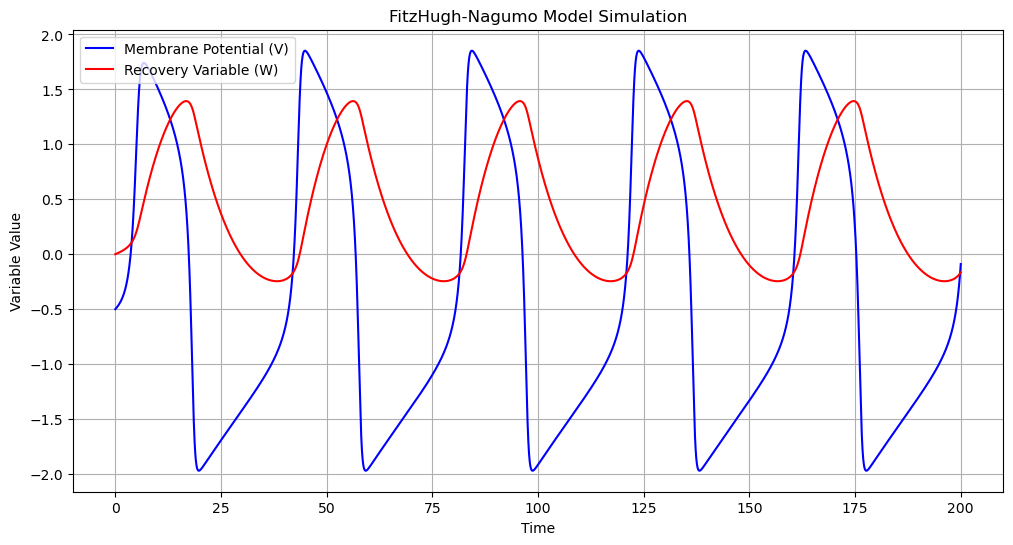


FitzHugh-Nagumo Model Analysis:
Mean Membrane Potential: -0.366
Potential Range: [-1.970, 1.852]
Oscillation Frequency: 0.03 Hz
Mean Recovery Variable: 0.430
Phase Space Area: 24.201
Stability Metric: 1.031

Behavioral Interpretation:
- Stable resting behavior
- Irregular dynamics


{'mean_potential': -0.3660038130825163,
 'max_potential': 1.8521170323521918,
 'min_potential': -1.9704067071443303,
 'oscillation_frequency': 0.025001250062503123,
 'recovery_mean': 0.4304119894982136,
 'phase_space_area': 24.20104095593016,
 'stability_metric': 1.0307042916459872}

In [5]:
# Demonstrate FitzHugh-Nagumo Model
fn = FitzhughNagumo()
t_fn, sol_fn = fn.simulate(T=200)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_fn, sol_fn[:, 0], 'b', label='Membrane Potential (V)')
plt.plot(t_fn, sol_fn[:, 1], 'r', label='Recovery Variable (W)')
plt.title('FitzHugh-Nagumo Model Simulation')
plt.xlabel('Time')
plt.ylabel('Variable Value')
plt.legend()
plt.grid(True)
plt.show()

# Display analysis
fn.explain_results(t_fn, sol_fn)

### 1.2 Izhikevich Neuron Model

In [6]:
class IzhikevichNeuron:
    """
    Izhikevich neuron model implementation with improved analysis capabilities.
    """
    def __init__(self, a=0.05, b=0.2, c=-65, d=8):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.reset()
    
    def reset(self):
        """Reset neuron to initial state."""
        self.v = self.c
        self.u = self.b * self.v
        self.synaptic_current = 0
        self.spike_times = []
        self.v_history = []
        self.u_history = []
        self.dt = None

    def step(self, I, dt=0.5):
        """
        Advance neuron state by one timestep.
        
        Parameters:
        -----------
        I : float
            Input current
        dt : float
            Time step (ms)
        """
        if self.v >= 30:  # Spike detection threshold
            self.spike_times.append(len(self.v_history) * dt)
            self.v = self.c
            self.u += self.d
        
        dv = (0.04*self.v**2 + 5*self.v + 140 - self.u + I + self.synaptic_current) * dt
        du = self.a * (self.b*self.v - self.u) * dt
        
        self.v += dv
        self.u += du
        self.synaptic_current = 0
        
        self.v_history.append(self.v)
        self.u_history.append(self.u)
        self.dt = dt
        
        return self.v
    
    def add_synaptic_input(self, weight: float):
        """Add synaptic input to neuron."""
        self.synaptic_current += weight
        
    def analyze_behavior(self):
        """Comprehensive analysis of neuron behavior."""
        if not self.v_history:
            return {}
            
        # Calculate key metrics
        total_time = len(self.v_history) * self.dt if self.dt else 0
        spike_rate = len(self.spike_times)/total_time if total_time > 0 else 0
        isi = np.diff(self.spike_times)
        cv = np.std(isi)/np.mean(isi) if len(isi) > 1 else 0
        
        # Determine firing pattern
        if spike_rate == 0:
            pattern = "Quiescent"
            characteristics = "No spiking activity"
        elif cv < 0.2:
            pattern = "Regular spiking"
            characteristics = "Stable periodic firing"
        elif cv < 0.5:
            pattern = "Irregular spiking"
            characteristics = "Variable interspike intervals"
        else:
            pattern = "Bursting"
            characteristics = "Clustered spike activity"
            
        print("\nIzhikevich Neuron Analysis:")
        print("==========================")
        print(f"Firing Pattern: {pattern}")
        print(f"Characteristics: {characteristics}")
        print(f"Mean Membrane Potential: {np.mean(self.v_history):.2f} mV")
        print(f"Firing Rate: {spike_rate:.2f} Hz")
        print(f"Spike Count: {len(self.spike_times)}")
        
        if len(isi) > 1:
            print(f"ISI CV: {cv:.3f}")
            print(f"Mean ISI: {np.mean(isi):.2f} ms")
            print(f"ISI Range: [{np.min(isi):.2f}, {np.max(isi):.2f}] ms")
        
        return {
            'pattern': pattern,
            'firing_rate': spike_rate,
            'cv': cv,
            'spike_count': len(self.spike_times)
        }


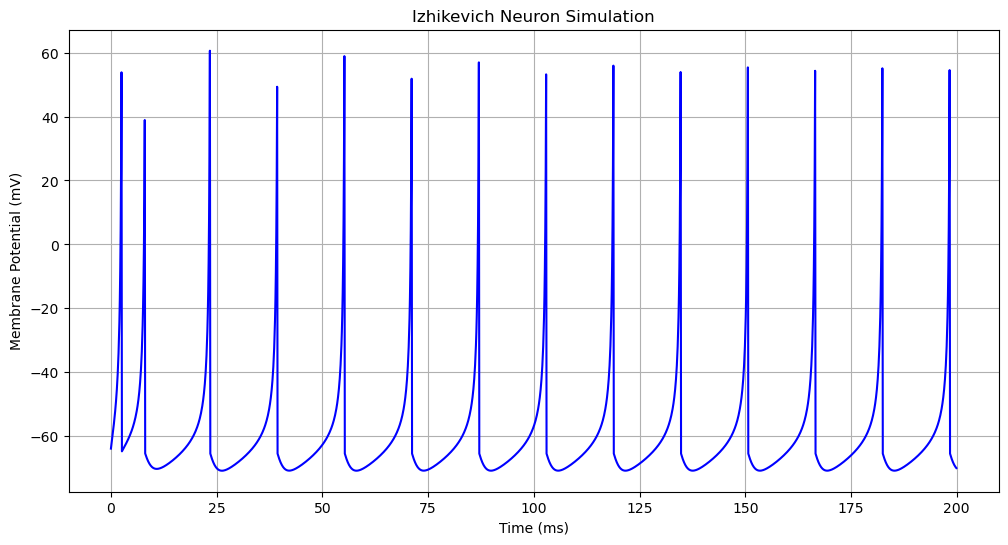


Izhikevich Neuron Analysis:
Firing Pattern: Regular spiking
Characteristics: Stable periodic firing
Mean Membrane Potential: -60.46 mV
Firing Rate: 0.07 Hz
Spike Count: 14
ISI CV: 0.183
Mean ISI: 15.06 ms
ISI Range: [5.50, 15.90] ms


{'pattern': 'Regular spiking',
 'firing_rate': 0.07,
 'cv': 0.18347195230528351,
 'spike_count': 14}

In [7]:
# Demonstrate Izhikevich Neuron
izh = IzhikevichNeuron(a=0.05, b=0.2, c=-65, d=8)
t_izh = np.arange(0, 200, 0.1)
I_constant = 14
[izh.step(I_constant, 0.1) for _ in t_izh]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_izh, izh.v_history, 'b')
plt.title('Izhikevich Neuron Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)
plt.show()

# Display analysis
izh.analyze_behavior()

### 1.3 Model Comparison

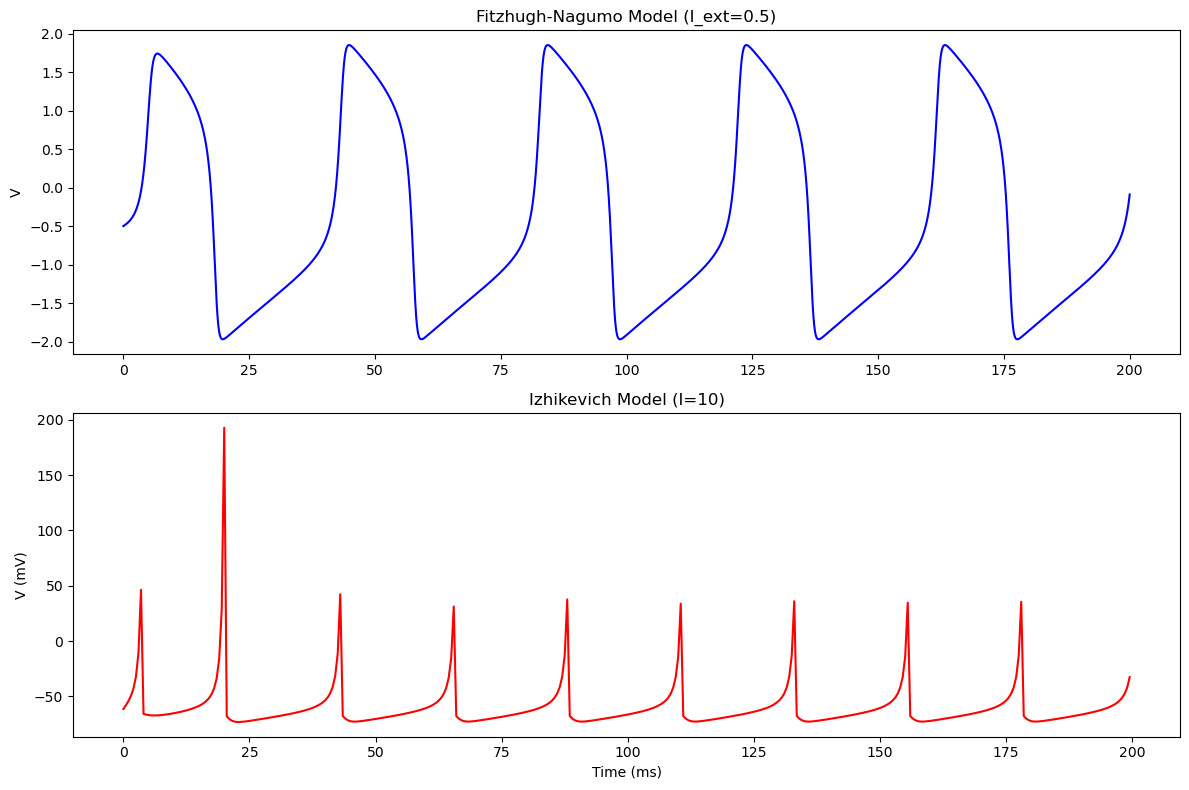

In [8]:
def compare_models():
    """Compare dynamics of different neuron models."""
    # FN Model simulation
    fn_model = FitzhughNagumo(I_ext=0.5)
    t_fn, sol_fn = fn_model.simulate(T=200)
    
    # Izhikevich Model simulation
    izh_model = IzhikevichNeuron()
    t_izh = np.arange(0, 200, 0.5)
    [izh_model.step(10, dt=0.5) for _ in t_izh]
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    ax1.plot(t_fn, sol_fn[:, 0], 'b', label='Membrane Potential')
    ax1.set_title('Fitzhugh-Nagumo Model (I_ext=0.5)')
    ax1.set_ylabel('V')
    
    ax2.plot(t_izh, izh_model.v_history, 'r')
    ax2.set_title('Izhikevich Model (I=10)')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('V (mV)')
    
    plt.tight_layout()
    plt.show()
    
# Compare both models
compare_models()

## 2. Network Implementation

In [9]:
# Section 2: Network Implementation
class NeuralNetwork:
    """
    Network of Izhikevich neurons with directed connections and 
    excitatory/inhibitory neurons.
    """
    def __init__(self, N=100, p_connect=0.1, inhibitory_ratio=0.2):
        self.N = N
        # Parameters optimized for regular spiking
        self.neurons = [IzhikevichNeuron(a=0.02, b=0.2, c=-65, d=8) for _ in range(N)]
        self.inhibitory = np.random.rand(N) < inhibitory_ratio
        self.connections = nx.gnp_random_graph(N, p_connect, directed=True)
        self.weights = {}
        
        # More consistent connection weights
        for (j, i) in self.connections.edges():
            if self.inhibitory[j]:
                self.weights[(j,i)] = -0.5  # Fixed inhibitory weight
            else:
                self.weights[(j,i)] = 1.0    # Fixed excitatory weight

    def simulate(self, T=500, dt=0.1):  # Reduced time step
        """Run network simulation with directed connections."""
        time = np.arange(0, T, dt)
        activity = np.zeros((self.N, len(time)))
        
        for t_idx, t in enumerate(time):
            for i in range(self.N):
                for j in self.connections.predecessors(i):
                    self.neurons[i].add_synaptic_input(self.weights.get((j,i), 0))
                # Constant external current without oscillations
                I_ext = 14.0  # Consistent current input
                activity[i, t_idx] = self.neurons[i].step(I_ext, dt)
        
        return time, activity

        
    def analyze_network(self, time, activity):
        """Comprehensive network analysis."""
        print("\nNeural Network Analysis:")
        print("=======================")
        
        # Basic statistics
        spike_threshold = 30
        spike_counts = [np.sum(trace > spike_threshold) for trace in activity]
        mean_rate = np.mean(spike_counts) / (time[-1]/1000)
        
        # Synchronization analysis
        population_activity = np.mean(activity > spike_threshold, axis=0)
        sync_index = np.std(population_activity)
        
        # Network metrics
        avg_degree = np.mean([d for _, d in self.connections.degree()])
        clustering = nx.average_clustering(self.connections.to_undirected())
        
        print(f"Network Size: {self.N} neurons")
        print(f"Average Firing Rate: {mean_rate:.2f} Hz")
        print(f"Synchronization Index: {sync_index:.3f}")
        print(f"Average Degree: {avg_degree:.2f}")
        print(f"Clustering Coefficient: {clustering:.3f}")
        
        # Burst detection
        burst_threshold = np.mean(population_activity) + np.std(population_activity)
        network_bursts = np.sum(population_activity > burst_threshold)
        print(f"Network Bursts: {network_bursts} ({network_bursts/(time[-1]/1000):.2f} Hz)")


In [10]:
# Section 3: Analysis Functions
def analyze_spike_train(voltage_trace, threshold=30, dt=0.5):
    """Analyze spike train properties with configurable threshold."""
    spikes = np.where(np.array(voltage_trace) > threshold)[0]
    isi = np.diff(spikes) * dt
    
    if len(isi) < 2:
        return 0, 0, []
    
    cv = np.std(isi)/np.mean(isi)
    rate = len(spikes) / (len(voltage_trace)*dt)
    return rate, cv, isi

def plot_network_analysis(time, activity):
    """Visualize network activity patterns."""
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
    
    # Raster plot
    spike_threshold = 30
    for i in range(activity.shape[0]):
        spikes = np.where(activity[i] > spike_threshold)[0]
        ax1.plot(time[spikes], i*np.ones_like(spikes), '|k', markersize=2)
    ax1.set_title('Network Raster Plot')
    ax1.set_ylabel('Neuron Index')
    
    # Population activity
    pop_activity = np.mean(activity > spike_threshold, axis=0)
    ax2.plot(time, pop_activity)
    ax2.set_title('Population Activity')
    ax2.set_ylabel('Firing Rate')
    
    # ISI histogram
    all_isi = []
    for trace in activity:
        _, _, isi = analyze_spike_train(trace, spike_threshold)
        all_isi.extend(isi)
    
    if all_isi:
        ax3.hist(all_isi, bins=50, density=True)
        ax3.set_title('Interspike Interval Distribution')
        ax3.set_xlabel('ISI (ms)')
        ax3.set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

def plot_phase_plane(model: FitzhughNagumo, trajectories=None):
    """
    Plot phase plane analysis with nullclines and optional trajectories.
    
    Parameters:
    -----------
    model : FitzhughNagumo
        The model instance to analyze
    trajectories : List of (t, solution) tuples
        Optional list of trajectories to plot
    """
    phase_data = model.phase_plane_analysis((-2, 2), (-2, 2))
    
    plt.figure(figsize=(10, 8))
    
    # Plot vector field
    plt.quiver(phase_data['V'], phase_data['W'], 
              phase_data['dV'], phase_data['dW'],
              alpha=0.3)
    
    # Plot nullclines
    plt.plot(phase_data['nullcline_v'][0], phase_data['nullcline_v'][1], 
             'b-', label='V-nullcline')
    plt.plot(phase_data['nullcline_w'][0], phase_data['nullcline_w'][1], 
             'r-', label='W-nullcline')
    
    # Plot trajectories if provided
    if trajectories:
        for t, sol in trajectories:
            plt.plot(sol[:, 0], sol[:, 1], 'g-', alpha=0.5)
            plt.plot(sol[0, 0], sol[0, 1], 'go', label='Start')
            plt.plot(sol[-1, 0], sol[-1, 1], 'ro', label='End')
    
    plt.xlabel('V (Membrane Potential)')
    plt.ylabel('W (Recovery Variable)')
    plt.title('Phase Plane Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_network_topology(network: NeuralNetwork):
    """Visualize network topology with node types and connection strengths"""
    plt.figure(figsize=(12, 8))
    
    # Create layout
    pos = nx.spring_layout(network.connections)
    
    # Draw nodes
    excitatory = [i for i in range(network.N) if not network.inhibitory[i]]
    inhibitory = [i for i in range(network.N) if network.inhibitory[i]]
    
    nx.draw_networkx_nodes(network.connections, pos, 
                          nodelist=excitatory,
                          node_color='b',
                          label='Excitatory')
    nx.draw_networkx_nodes(network.connections, pos,
                          nodelist=inhibitory,
                          node_color='r',
                          label='Inhibitory')
    
    # Draw edges with weights
    edge_weights = [abs(network.weights.get((u,v), 0)) 
                   for u,v in network.connections.edges()]
    
    nx.draw_networkx_edges(network.connections, pos,
                          width=np.array(edge_weights)*2,
                          alpha=0.6)
    
    plt.title('Network Topology')
    plt.legend()
    plt.axis('off')
    plt.show()


Neural Network Analysis:
Network Size: 100 neurons
Average Firing Rate: 49.99 Hz
Synchronization Index: 0.017
Average Degree: 20.04
Clustering Coefficient: 0.193
Network Bursts: 341 (682.14 Hz)


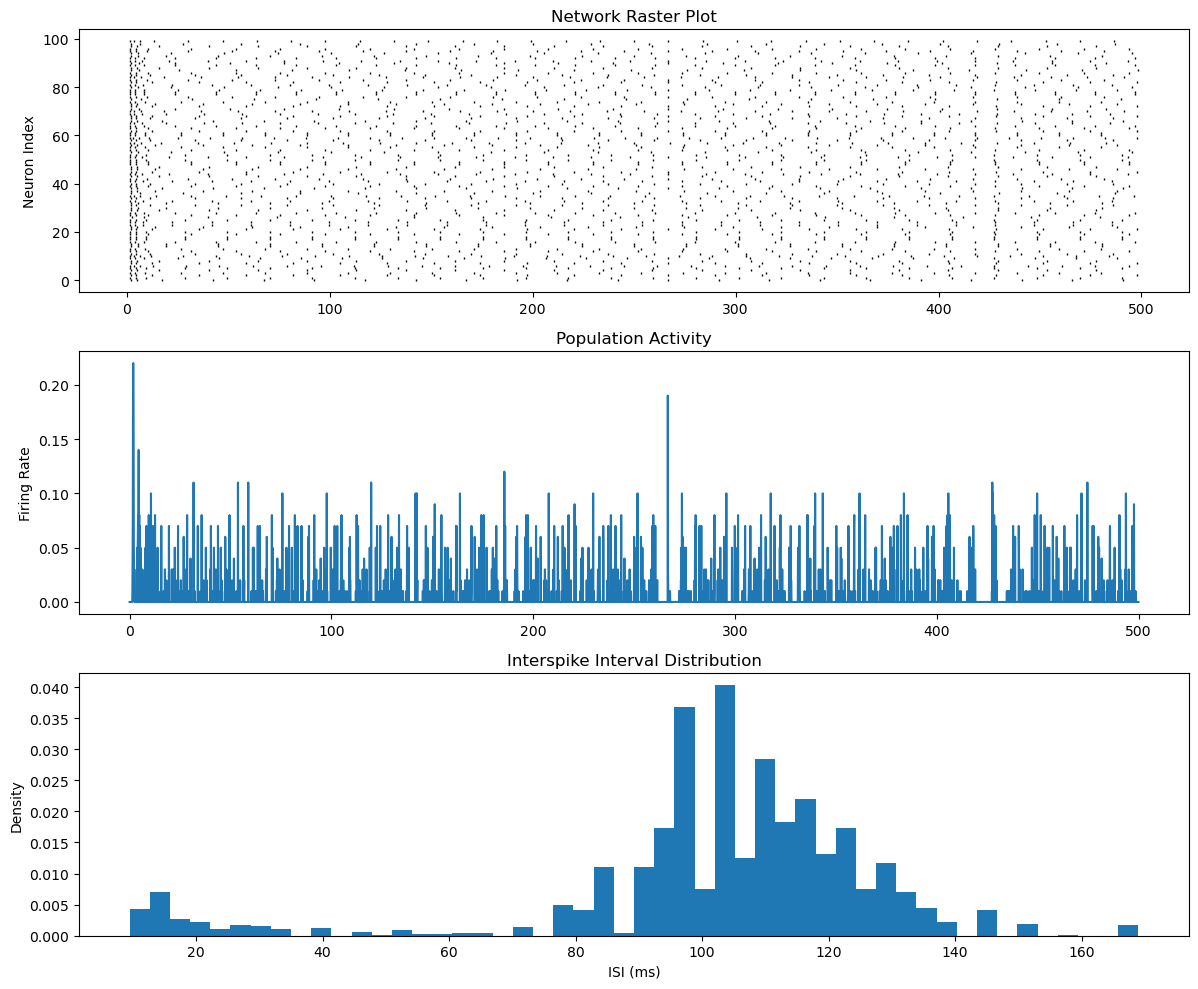

In [11]:
# Demonstrate Network Simulation
net = NeuralNetwork(N=100, p_connect=0.1)
time, activity = net.simulate(T=500)

# Analyze network
net.analyze_network(time, activity)

# Plot network analysis
plot_network_analysis(time, activity)

## 3. Advanced Analysis

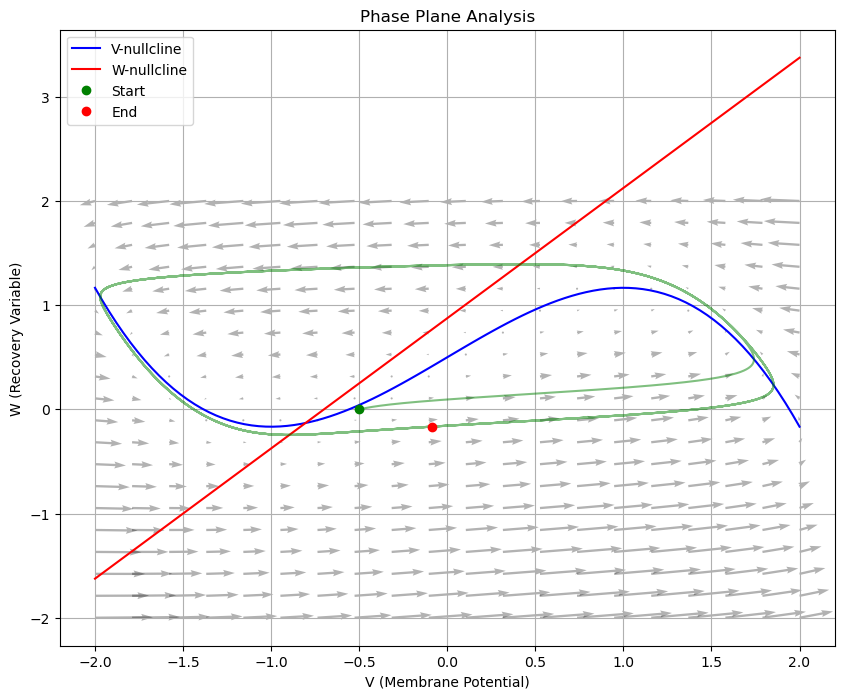

In [12]:
# Phase Plane Analysis
fn = FitzhughNagumo()
t, sol = fn.simulate(T=200)
plot_phase_plane(fn, [(t, sol)])

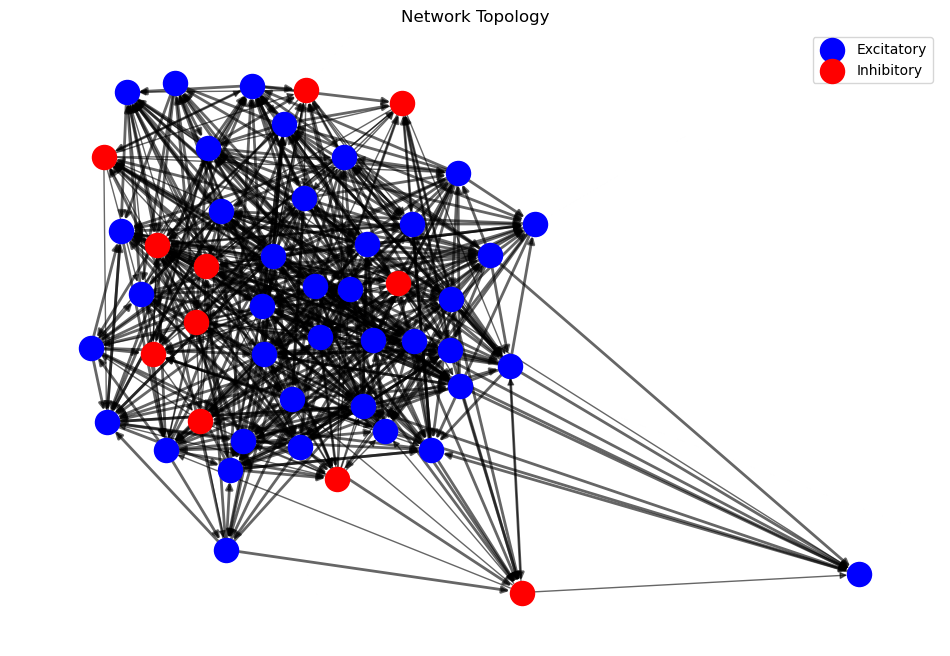

In [13]:
# Network Topology Visualization
net = NeuralNetwork(N=50, p_connect=0.2)
plot_network_topology(net)